In [1]:
import pandas as pd

In [6]:
ufo=pd.read_csv('http://bit.ly/uforeports')

In [7]:
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [8]:
ufo.dtypes# time should be datetime, not object

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [9]:
ufo['Time'] = pd.to_datetime(ufo['Time'])#DATE TIME ORNEGI

In [10]:
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00


In [11]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [16]:
ufo['Hour'] = ufo.Time.dt.hour #feature eng.

In [20]:
ufo['Day'] = ufo.Time.dt.day

In [23]:
ufo.loc[ufo.Time > '1930-06-01 22:00:00'].head(3)

,City,Colors Reported,Shape Reported,State,Time,Hour,Day
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,20,30
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,14,15
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,13,1


In [26]:
import pandas_profiling
pandas_profiling.ProfileReport(ufo)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 10).')
  correlation_name=correlation_name, error=error


In [33]:
ufo.Colors_Reported.isnull().sum()

15359

In [36]:
ufo.Colors_Reported.fillna(value = 'Other values')

0        Other values
1        Other values
2        Other values
3        Other values
4        Other values
5        Other values
6        Other values
7        Other values
8        Other values
9        Other values
10       Other values
11       Other values
12                RED
13       Other values
14       Other values
15       Other values
16       Other values
17       Other values
18       Other values
19                RED
20       Other values
21       Other values
22       Other values
23       Other values
24       Other values
25       Other values
26       Other values
27       Other values
28       Other values
29       Other values
             ...     
18211    Other values
18212    Other values
18213           GREEN
18214    Other values
18215    Other values
18216          ORANGE
18217    Other values
18218    Other values
18219    Other values
18220            BLUE
18221    Other values
18222    Other values
18223    Other values
18224    Other values
18225    O

In [22]:
ts=pd.to_datetime('1/1/2000')

In [26]:
ufo.loc[ufo.Time>=ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
15606,Bakersfield,NaN,NaN,CA,2000-01-01 00:01:00
15607,New York City,NaN,SPHERE,NY,2000-01-01 00:01:00
15608,Los Angeles,NaN,NaN,CA,2000-01-01 00:03:00
15609,San Diego,GREEN,LIGHT,CA,2000-01-01 00:23:00
15610,Laporte,NaN,OTHER,TX,2000-01-01 02:13:00


In [28]:
ufo.Time.max()- ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [29]:
%matplotlib inline

In [30]:
ufo['Year']=ufo.Time.dt.year#SUTUN EKLEME, DAHA ONCE YAPMISTIK

In [32]:
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930


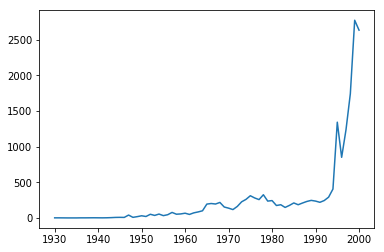

In [35]:
ufo.Year.value_counts().sort_index().plot()